In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import itertools
import os
from sklearn.model_selection import train_test_split


# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('balanced_urls.csv')

In [4]:
df

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0
...,...,...,...
632503,xbox360.ign.com/objects/850/850402.html,malicious,1
632504,games.teamxbox.com/xbox-360/1860/Dead-Space/,malicious,1
632505,www.gamespot.com/xbox360/action/deadspace/,malicious,1
632506,en.wikipedia.org/wiki/Dead_Space_(video_game),malicious,1


In [6]:
df.label.value_counts()

label
benign       316254
malicious    316254
Name: count, dtype: int64

In [7]:
df.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [6]:
df_benign = df[df.label=='benign']
df_malicious = df[df.label=='malicious']


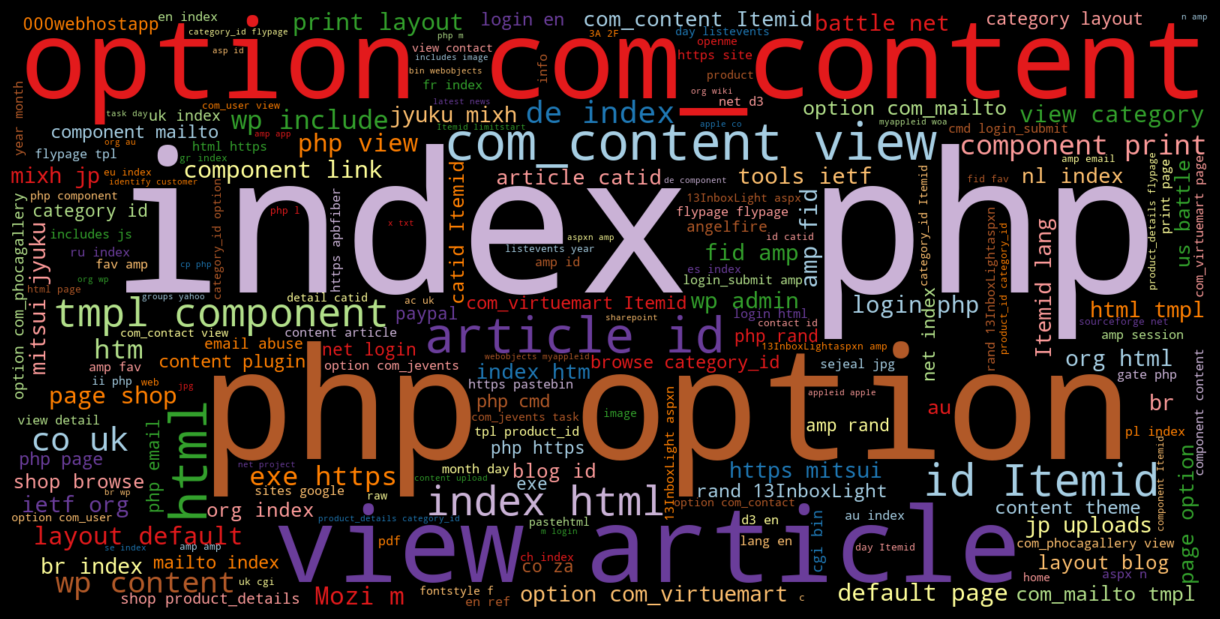

In [7]:
malicious_url = " ".join(i for i in df_malicious.url)
wordcloud= WordCloud(width=1600,height=800,colormap='Paired').generate(malicious_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


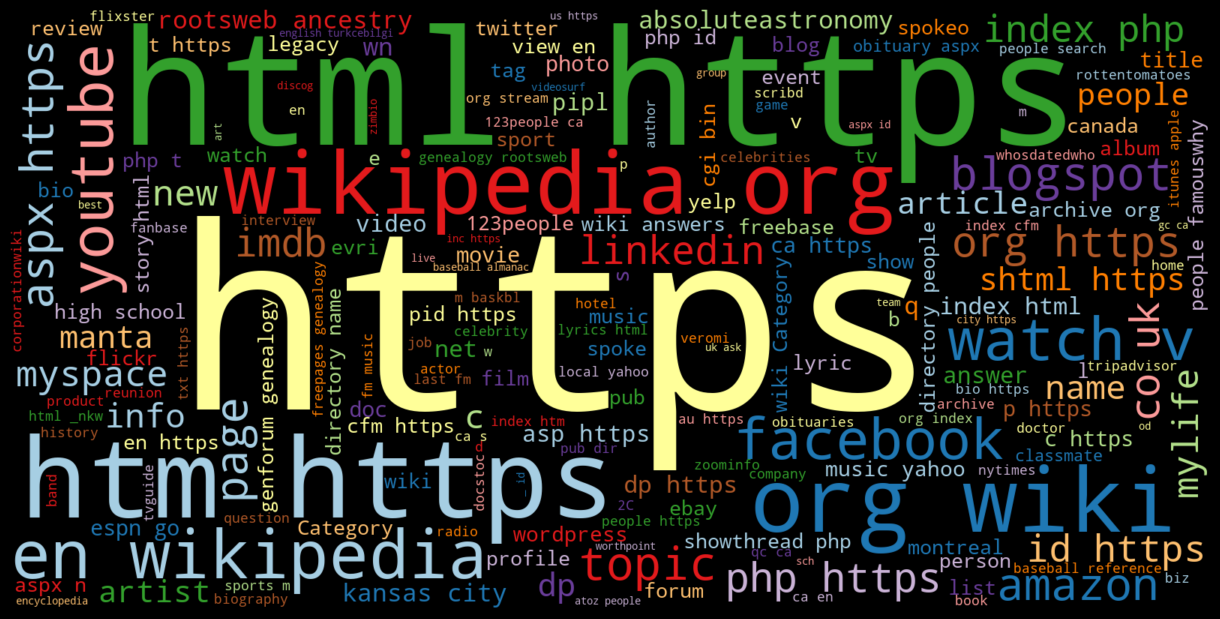

In [8]:
benign_url = " ".join(i for i in df_benign.url)
wordcloud= WordCloud(width=1600,height=800,colormap='Paired').generate(benign_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
df=df.drop(columns="result")

In [9]:
df

,url,label
0,https://www.google.com,benign
1,https://www.youtube.com,benign
2,https://www.facebook.com,benign
3,https://www.baidu.com,benign
4,https://www.wikipedia.org,benign
...,...,...
632503,xbox360.ign.com/objects/850/850402.html,malicious
632504,games.teamxbox.com/xbox-360/1860/Dead-Space/,malicious
632505,www.gamespot.com/xbox360/action/deadspace/,malicious
632506,en.wikipedia.org/wiki/Dead_Space_(video_game),malicious


In [18]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')	# make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')	# make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')	# make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))	#remove redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens

In [19]:
y =df["label"]

In [20]:
y

0            benign
1            benign
2            benign
3            benign
4            benign
            ...    
632503    malicious
632504    malicious
632505    malicious
632506    malicious
632507    malicious
Name: label, Length: 632508, dtype: object

In [21]:
url_list = df["url"]

In [22]:
# Using Default Tokenizer
#vectorizer = TfidfVectorizer()

# Using Custom Tokenizer
vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [23]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Model Building
#using logistic regression
logit = LogisticRegression()	
logit.fit(X_train, y_train)

C:\Users\subha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# Accuracy of Our Model
print("Accuracy ",logit.score(X_test, y_test))

Accuracy  0.9967510395092568


In [27]:
X_predict = ["https://www.wikipedia.org	","xbox360.ign.com/objects/850/850402.html"]

In [28]:
X_predict = vectorizer.transform(X_predict)
New_predict = logit.predict(X_predict)

In [29]:
print(New_predict)

['benign' 'malicious']


In [30]:
# Using Default Tokenizer
vectorizer = TfidfVectorizer()

In [46]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)	

In [47]:
# Model Building

logit = LogisticRegression()	#using logistic regression
logit.fit(X_train, y_train)

C:\Users\subha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Accuracy of Our Model with our Custom Token
print("Accuracy ",logit.score(X_test, y_test))

Accuracy  0.9936522742723435
